## Laboratorio #2 Redes neuronales
##### Jose Guerra: 20053
##### Pablo Gonzalez: 20362

In [250]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [251]:
data = pd.read_csv('data/movie_statistic_dataset.csv')
data.dtypes


movie_title              object
production_date          object
genres                   object
runtime_minutes         float64
director_name            object
director_professions     object
director_birthYear       object
director_deathYear       object
movie_averageRating     float64
movie_numerOfVotes      float64
approval_Index          float64
Production budget $       int64
Domestic gross $          int64
Worldwide gross $         int64
dtype: object

Eliminacion de nulos

In [252]:
data = data.replace(r'-|\n', '', regex=True)
data.dropna(inplace=True)

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.2+ KB


In [254]:
data.shape

(4380, 14)

In [255]:
pd.set_option('display.width',100)
pd.set_option('display.precision',3)
data.describe()

# Como se puede visualizar los datos no presentan una varianza alta por lo que esto es bueno para el modelo


,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
count,4380.000,4380.000,4.380e+03,4380.000,4.380e+03,4.380e+03,4.380e+03
mean,109.786,6.407,1.370e+05,5.033,3.869e+07,5.256e+07,1.149e+08
std,20.376,1.024,2.151e+05,1.385,4.574e+07,7.509e+07,2.007e+08
min,63.000,1.500,5.000e+00,0.395,5.000e+04,2.640e+02,4.230e+02
25%,96.000,5.800,2.141e+04,4.178,1.000e+07,8.866e+06,1.299e+07
50%,106.000,6.500,6.498e+04,5.039,2.300e+07,2.832e+07,4.448e+07
75%,120.000,7.100,1.599e+05,5.944,5.000e+07,6.410e+07,1.280e+08
max,271.000,9.300,2.696e+06,10.000,4.600e+08,8.584e+08,2.924e+09


C:\Users\pablo\AppData\Local\Temp\ipykernel_648\1090781252.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["runtime_minutes"], ax = axes[0,0])
C:\Users\pablo\AppData\Local\Temp\ipykernel_648\1090781252.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["movie_averageRating"], ax =

C:\Users\pablo\AppData\Local\Temp\ipykernel_648\1090781252.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["approval_Index"], ax = axes[1,0])
C:\Users\pablo\AppData\Local\Temp\ipykernel_648\1090781252.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Production budget $"], ax = 

<AxesSubplot: xlabel='Worldwide gross $', ylabel='Density'>

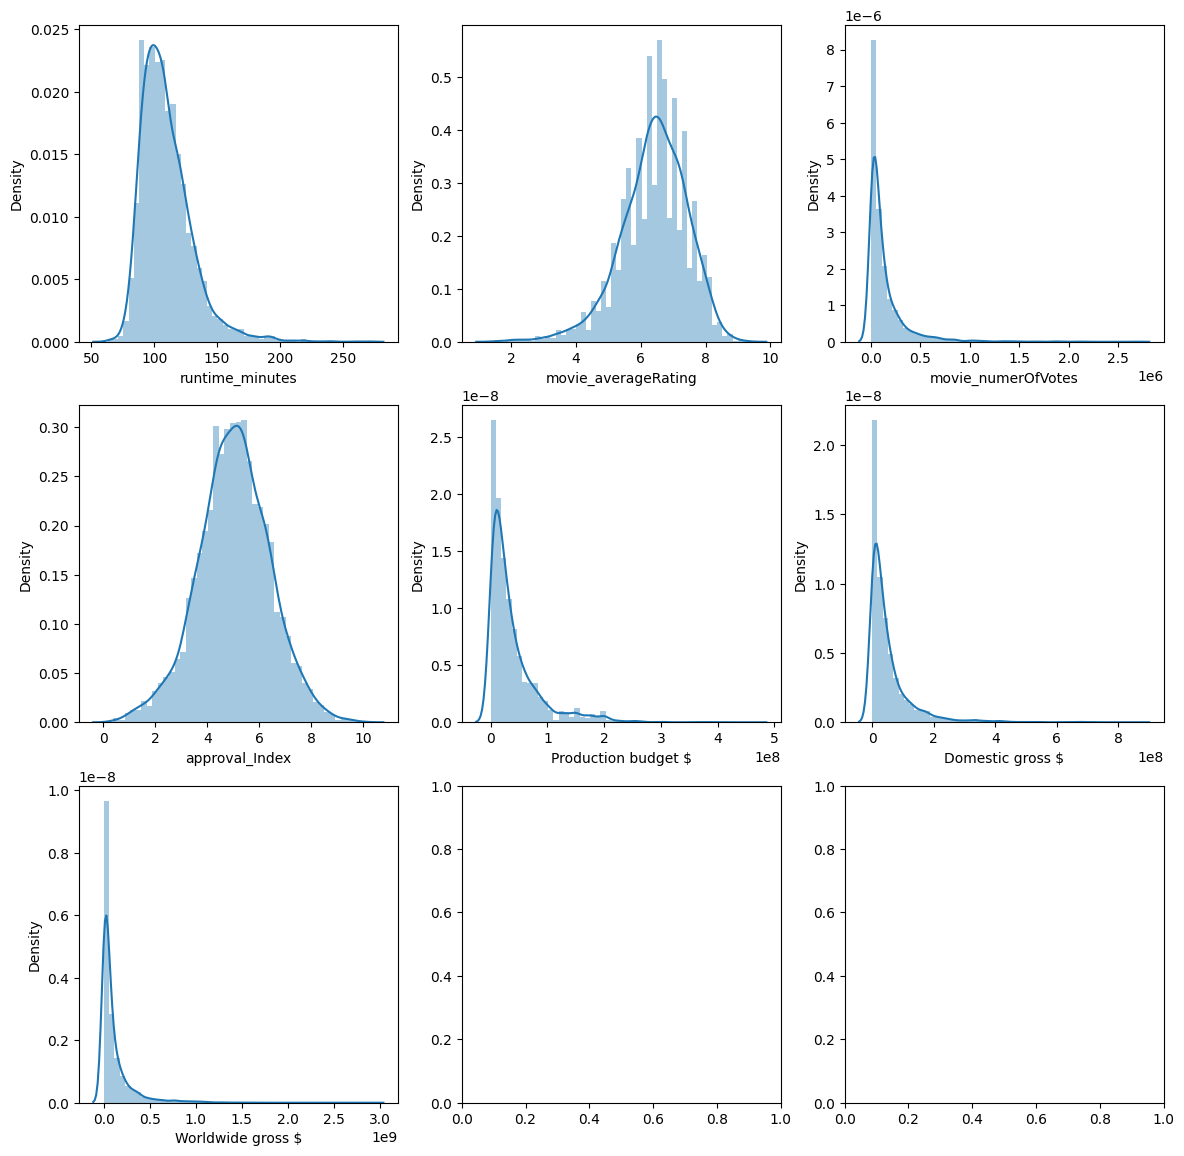

In [256]:
import seaborn as sns
f, axes = plt.subplots(3,3,figsize =(14,14))
sns.distplot(data["runtime_minutes"], ax = axes[0,0])
sns.distplot(data["movie_averageRating"], ax = axes[0,1])
sns.distplot(data["movie_numerOfVotes"], ax = axes[0,2])
sns.distplot(data["approval_Index"], ax = axes[1,0])
sns.distplot(data["Production budget $"], ax = axes[1,1])
sns.distplot(data["Domestic gross $"], ax = axes[1,2])
sns.distplot(data["Worldwide gross $"], ax = axes[2,0])



In [301]:

# Variables categoricas
variables_categoricas = ['movie_title', "production_date" ,'genres', 'director_name', 'director_professions']

for variable in variables_categoricas:
    grupos = data.groupby(variable)['movie_averageRating'].apply(list)
    resultado_anova = stats.f_oneway(*grupos)
    valor_p = resultado_anova.pvalue
    
    print(f"\nTest de ANOVA para la variable '{variable}':")
    
    print(f"Valor p: {valor_p}")
    nivel_significancia = 0.05
    if valor_p < nivel_significancia:
        print("Hay diferencias significativas entre los grupos.")
    else:
        print("No se encontraron diferencias significativas entre los grupos.")



Test de ANOVA para la variable 'movie_title':
Valor p: 0.93254708020081
No se encontraron diferencias significativas entre los grupos.

Test de ANOVA para la variable 'production_date':
Valor p: 0.11766106146028266
No se encontraron diferencias significativas entre los grupos.

Test de ANOVA para la variable 'genres':
Valor p: 7.538428814184124e-115
Hay diferencias significativas entre los grupos.

Test de ANOVA para la variable 'director_name':
Valor p: 3.288534028568514e-89
Hay diferencias significativas entre los grupos.

Test de ANOVA para la variable 'director_professions':
Valor p: 7.64457114560171e-16
Hay diferencias significativas entre los grupos.


In [258]:
valores_nulos = data.isnull()

# Utiliza sum() para contar los valores True en cada columna, que representa la cantidad de nulos en cada columna
cantidad_nulos_por_columna = valores_nulos.sum()

# Para obtener la cantidad total de valores nulos en el DataFrame, puedes sumar los valores de cantidad_nulos_por_columna
cantidad_total_nulos = cantidad_nulos_por_columna.sum()

# Muestra la cantidad de nulos por columna y la cantidad total de nulos
print("Cantidad de nulos por columna:")
print(cantidad_nulos_por_columna)

print("\nCantidad total de nulos en el DataFrame:", cantidad_total_nulos)

Cantidad de nulos por columna:
movie_title             0
production_date         0
genres                  0
runtime_minutes         0
director_name           0
director_professions    0
director_birthYear      0
director_deathYear      0
movie_averageRating     0
movie_numerOfVotes      0
approval_Index          0
Production budget $     0
Domestic gross $        0
Worldwide gross $       0
dtype: int64

Cantidad total de nulos en el DataFrame: 0


C:\Users\pablo\AppData\Local\Temp\ipykernel_648\2921579763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


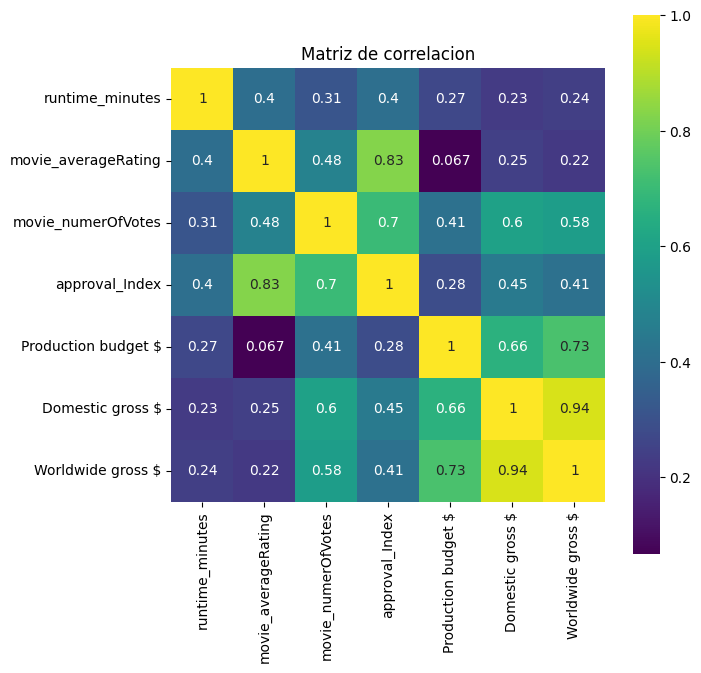

In [259]:
correlation = data.corr()
plt.figure(figsize=(7,7))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

In [260]:
X = data[['approval_Index','movie_numerOfVotes','runtime_minutes','Worldwide gross $']]
y = data[['movie_averageRating']]
X = np.asarray(X)
y = np.asarray(y)


In [261]:
y

array([[7.8],
       [8.4],
       [6.6],
       ...,
       [4.9],
       [6.2],
       [6.2]])

In [262]:
from sklearn.model_selection import train_test_split
#X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [263]:
y_train

array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

In [264]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [265]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

## Primer modelo

In [266]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
]);


In [267]:
batched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_absolute_error']
)

In [268]:
batched_history =  batched_model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/100
83/83 - 3s - loss: 36.1300 - mean_absolute_error: 5.9610 - val_loss: 30.6812 - val_mean_absolute_error: 5.4510 - 3s/epoch - 31ms/step
Epoch 2/100
83/83 - 0s - loss: 18.6692 - mean_absolute_error: 4.2167 - val_loss: 10.9819 - val_mean_absolute_error: 3.2081 - 205ms/epoch - 2ms/step
Epoch 3/100
83/83 - 0s - loss: 3.9043 - mean_absolute_error: 1.7351 - val_loss: 1.1244 - val_mean_absolute_error: 0.8585 - 176ms/epoch - 2ms/step
Epoch 4/100
83/83 - 0s - loss: 0.5072 - mean_absolute_error: 0.5257 - val_loss: 0.4179 - val_mean_absolute_error: 0.4738 - 165ms/epoch - 2ms/step
Epoch 5/100
83/83 - 0s - loss: 0.2992 - mean_absolute_error: 0.3832 - val_loss: 0.3656 - val_mean_absolute_error: 0.3764 - 179ms/epoch - 2ms/step
Epoch 6/100
83/83 - 0s - loss: 0.3258 - mean_absolute_error: 0.4045 - val_loss: 0.2756 - val_mean_absolute_error: 0.3532 - 182ms/epoch - 2ms/step
Epoch 7/100
83/83 - 0s - loss: 0.2543 - mean_absolute_error: 0.3556 - val_loss: 0.4234 - val_mean_absolute_error: 0.4477 -

In [269]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

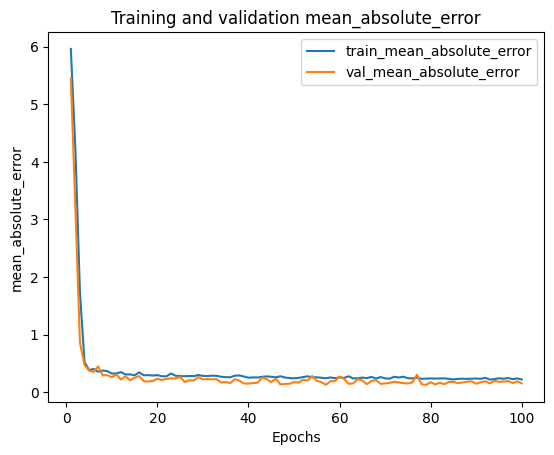

In [270]:
plot_metric(batched_history, "mean_absolute_error")


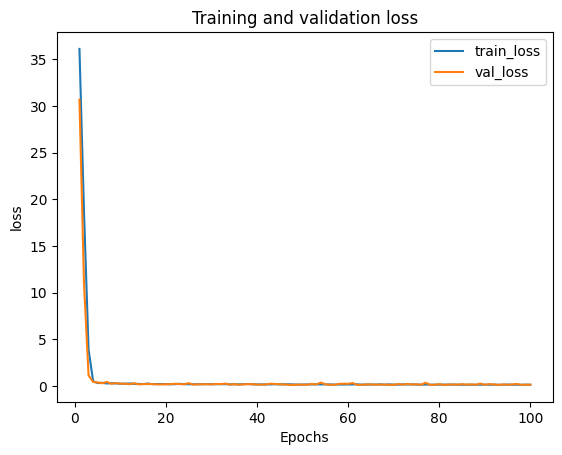

In [271]:
plot_metric(batched_history, 'loss')

In [272]:
batched_model.evaluate(X_train, y_train, verbose=2)

y_train

110/110 - 0s - loss: 0.0838 - mean_absolute_error: 0.1385 - 95ms/epoch - 865us/step


array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

In [273]:
y_hat = batched_model.predict(X_train)
y_hat

110/110 [==============================] - 0s 727us/step


array([[5.87698  ],
       [5.878842 ],
       [7.1825466],
       ...,
       [7.403973 ],
       [7.01634  ],
       [6.5594068]], dtype=float32)

In [274]:
y_train

array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

## Segundo modelo

In [275]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model2 = Sequential([
    Dense(64, input_shape=(4,), activation="tanh"),
    BatchNormalization(),
    Dense(128, activation='tanh'),
    BatchNormalization(),
    Dense(64, activation='tanh'),
    BatchNormalization(),
    Dense(1, activation='linear')
]);


In [276]:
batched_model2.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_absolute_error']
)

In [289]:
batched_history2 =  batched_model2.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/100
83/83 - 1s - loss: 36.2097 - mean_absolute_error: 5.9386 - val_loss: 34.6016 - val_mean_absolute_error: 5.8174 - 1s/epoch - 17ms/step
Epoch 2/100
83/83 - 0s - loss: 20.7693 - mean_absolute_error: 4.4886 - val_loss: 17.0516 - val_mean_absolute_error: 4.0286 - 134ms/epoch - 2ms/step
Epoch 3/100
83/83 - 0s - loss: 5.7311 - mean_absolute_error: 2.2322 - val_loss: 2.7736 - val_mean_absolute_error: 1.5524 - 135ms/epoch - 2ms/step
Epoch 4/100
83/83 - 0s - loss: 0.7754 - mean_absolute_error: 0.6829 - val_loss: 0.4712 - val_mean_absolute_error: 0.5132 - 132ms/epoch - 2ms/step
Epoch 5/100
83/83 - 0s - loss: 0.3014 - mean_absolute_error: 0.3912 - val_loss: 0.2955 - val_mean_absolute_error: 0.3576 - 131ms/epoch - 2ms/step
Epoch 6/100
83/83 - 0s - loss: 0.3091 - mean_absolute_error: 0.3981 - val_loss: 0.2908 - val_mean_absolute_error: 0.3464 - 138ms/epoch - 2ms/step
Epoch 7/100
83/83 - 0s - loss: 0.3117 - mean_absolute_error: 0.3978 - val_loss: 0.2890 - val_mean_absolute_error: 0.3321 -

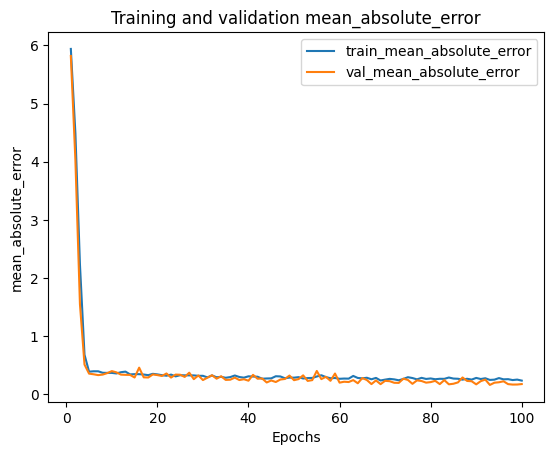

In [290]:
plot_metric(batched_history2, "mean_absolute_error")

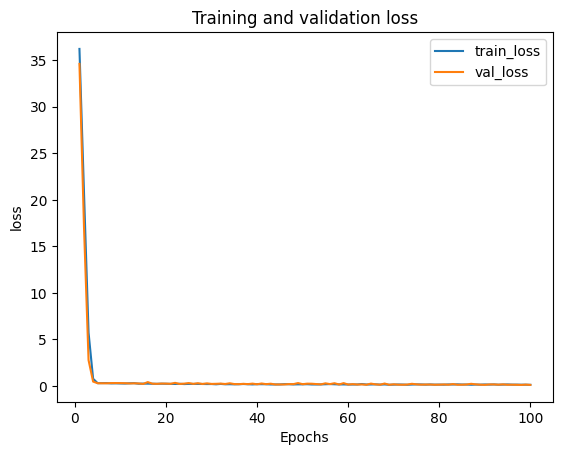

In [291]:
plot_metric(batched_history2, 'loss')

In [293]:
batched_model2.evaluate(X_train, y_train, verbose=2)

y_train

110/110 - 0s - loss: 0.0914 - mean_absolute_error: 0.1708 - 109ms/epoch - 995us/step


array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

In [292]:
y_hat2 = batched_model2.predict(X_train)
y_hat2

110/110 [==============================] - 0s 721us/step


array([[6.235684 ],
       [5.850476 ],
       [7.1607695],
       ...,
       [7.4803443],
       [7.076261 ],
       [6.394581 ]], dtype=float32)

### Tercer modelo

In [294]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model3= Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
])

In [295]:
batched_model3.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_absolute_error']
)

In [296]:
batched_history3 =  batched_model3.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/100
83/83 - 3s - loss: 36.9908 - mean_absolute_error: 6.0213 - val_loss: 30.1749 - val_mean_absolute_error: 5.4305 - 3s/epoch - 31ms/step
Epoch 2/100
83/83 - 0s - loss: 24.1931 - mean_absolute_error: 4.8633 - val_loss: 16.9062 - val_mean_absolute_error: 4.0536 - 218ms/epoch - 3ms/step
Epoch 3/100
83/83 - 0s - loss: 10.4434 - mean_absolute_error: 3.1339 - val_loss: 5.8845 - val_mean_absolute_error: 2.3541 - 209ms/epoch - 3ms/step
Epoch 4/100
83/83 - 0s - loss: 2.6068 - mean_absolute_error: 1.4512 - val_loss: 1.2292 - val_mean_absolute_error: 0.9794 - 205ms/epoch - 2ms/step
Epoch 5/100
83/83 - 0s - loss: 0.5711 - mean_absolute_error: 0.5845 - val_loss: 0.5918 - val_mean_absolute_error: 0.5558 - 208ms/epoch - 3ms/step
Epoch 6/100
83/83 - 0s - loss: 0.2968 - mean_absolute_error: 0.3860 - val_loss: 0.3651 - val_mean_absolute_error: 0.3419 - 205ms/epoch - 2ms/step
Epoch 7/100
83/83 - 0s - loss: 0.2885 - mean_absolute_error: 0.3806 - val_loss: 0.2847 - val_mean_absolute_error: 0.3416 

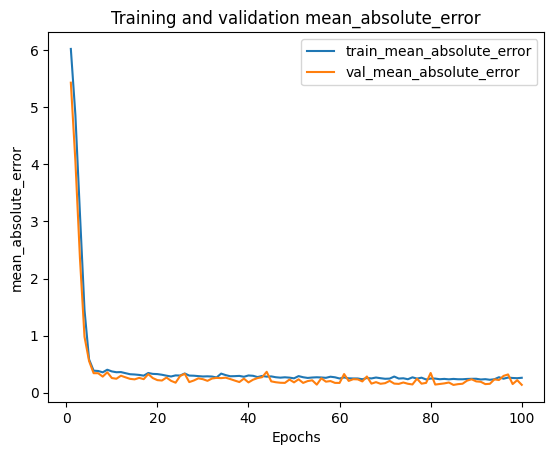

In [297]:
plot_metric(batched_history3, "mean_absolute_error")

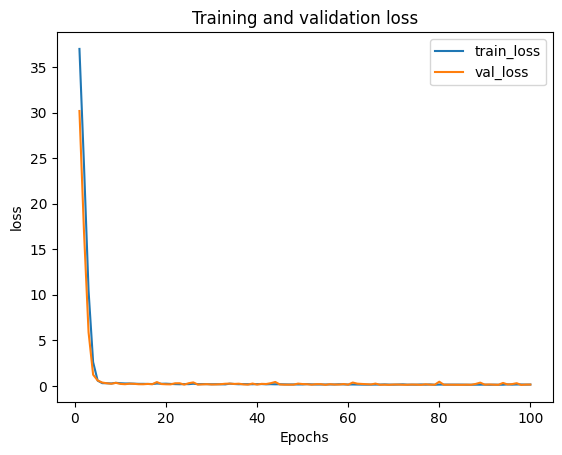

In [298]:
plot_metric(batched_history3, 'loss')

In [299]:
batched_model3.evaluate(X_train, y_train, verbose=2)

y_train

110/110 - 0s - loss: 0.1028 - mean_absolute_error: 0.1295 - 105ms/epoch - 951us/step


array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

In [300]:
y_hat2 = batched_model2.predict(X_train)
y_hat2

110/110 [==============================] - 0s 732us/step


array([[6.235684 ],
       [5.850476 ],
       [7.1607695],
       ...,
       [7.4803443],
       [7.076261 ],
       [6.394581 ]], dtype=float32)